In [156]:
from IPython.display import Latex
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import scipy.stats as st
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import random

# Часть 1

###  П. 1-2

In [97]:
%%latex
Пусть A - событие "убил обвиняемый", B - событие "на месте преступления найдена указанная группа крови". 
Тогда
$$\\$$
$$P(A|B) = \frac{P(B|A)*P(A)}{P(B)} = \frac{(1 * 1/10^6)}{(1 * 1/10^6 + (10^6 - 1)/10^6 * 0.01)} \approx 0.01\%\\$$
1) Прокурор: Пусть С - событие "обвиняемый имеет найденную на месте преступления группу крови". 
    Т.к. события "не A" и C - независимые
    $$\\$$
    $$P(С|\overline{A})=P(С)=0.01\\$$
    Далее, он посчитал
    $$\\$$
    $$\\1 - P(С|\overline{A}) = P(-C)\\$$
2) Адвокат оценил
$$\\$$
    $$\frac{P(B|A)*P(A)}{P(С)} = \frac{(1 * 1/10^6)}{0.01} = 0.01%$$. 

<IPython.core.display.Latex object>

###  П. 3

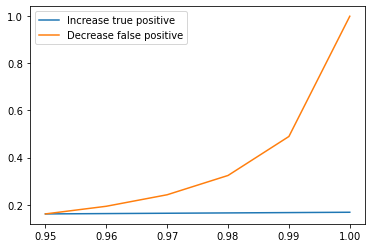

In [38]:
x = np.arange(0.95, 1.00, 0.01)
y_tp = 0.01 * x / (0.01 * x + 0.99 * 0.05)
y_fp = 0.01 * 0.95 / (0.01 * 0.95 + 0.99 * (1 - x))
plt.plot(x, y_tp, label = "Increase true positive")
plt.plot(x, y_fp, label = "Decrease false positive")
plt.legend(loc='best')
plt.show()

# Так.обр., на точность влияет только y_fp.

# Часть 2

In [113]:
filename = 'owid-covid-data.csv'
df_raw = pd.read_csv(filename)
df_filtered = df_raw[(df_raw['date'] >= '2020-03-03') & (df_raw['location'] == 'Russia')]
count = len(df_filtered)
y = df_filtered['total_cases']
delta_y = df_filtered['new_cases']
x = np.arange(1, count + 1, 1)

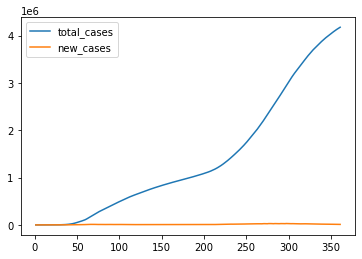

In [114]:
plt.plot(x, y, label = "total_cases")
plt.plot(x, delta_y, label = "new_cases")
plt.legend(loc='best')
plt.show()

In [117]:
y_train = y.head(50)
y_train_ln = np.log(y_train)
x_train = np.arange(1, 51, 1)
y_test = y.tail(count - 50)
y_test_ln = np.log(y_test)
x_test = np.arange(51, count + 1, 1)

### П. 2а

In [142]:
regr = linear_model.LinearRegression()
regr.fit(x_train.reshape(-1, 1), y_train_ln)
y_pred_ln = regr.predict(x_test.reshape(-1, 1))
# The coefficients
print('Coefficients: \n', [regr.coef_[0], regr.intercept_])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_ln, y_pred_ln))

Coefficients: 
 [0.19829091233588558, 1.6224462364488117]
Mean squared error: 1099.10


### П. 2b

In [148]:
sigma_map = 1/2 * math.sqrt(mean_squared_error(y_test_ln, y_pred_ln))

prior_params_sigma = (.05, .05)
prior_params_slope = (.05, .05)
prior_params_intercept = (.05, .05)

pri_sigma = st.norm(prior_params_sigma[0], prior_params_sigma[1]).pdf          
pri_slope = st.norm(prior_params_slope[0], prior_params_slope[1]).pdf
pri_intercept = st.norm(prior_params_intercept[0], prior_params_intercept[1]).pdf

def likelihood(sigma, slope, intercept, xs, ys, n):
    res = 0
    for i in range(50):
        res = res * 1/sqrt(2 * math.pi * sigma ** 2) * math.exp(-1/2/sigma ** 2 * (ys[i] - intercept - slope * xs[i]))
    return res
                   
lk = lambda sigma, slope, intercept : likelihood(sigma, slope, intercept, x_train, y_train_ln, 50)
                   
post = lambda sigma, slope, intercept : lk(sigma, slope, intercept) * pri_sigma(sigma) * pri_slope(slope) * pri_intercept

### П. 2c

int: 1.61 sl: 0.15
1 мая: 36677
1 июня: 3637908
1 сентября: 3060756409264
int: 1.58 sl: 0.19
1 мая: 392347
1 июня: 134479087
1 сентября: 4485754904697298
int: 1.61 sl: 0.24
1 мая: 8120489
1 июня: 13113646717
1 сентября: 43516993632373538816
int: 1.66 sl: 0.24
1 мая: 8536836
1 июня: 13785997761
1 сентября: 45748157606893985792
int: 1.57 sl: 0.23
1 мая: 4281873
1 июня: 5071585152
1 сентября: 6706998409807136768
int: 1.66 sl: 0.19
1 мая: 425024
1 июня: 145679456
1 сентября: 4859360277018090
int: 1.62 sl: 0.23
1 мая: 4501409
1 июня: 5331610884
1 сентября: 7050873571670177792
int: 1.66 sl: 0.19
1 мая: 425024
1 июня: 145679456
1 сентября: 4859360277018090
int: 1.58 sl: 0.23
1 мая: 4324906
1 июня: 5122555431
1 сентября: 6774404864458934272
int: 1.64 sl: 0.23
1 мая: 4592343
1 июня: 5439316568
1 сентября: 7193310666177176576


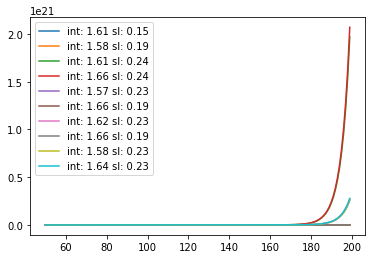

In [162]:
#03.03.2020 - 63 день года (1), т.е. будем далее вычитать 62
#01.05.2020 - 122 день года (60)
#01.06.2020 - 153 день года (91)
#01.09.2020 - 245 день года (183)

xs = np.arange(50, 200, 1)
xs_slope = np.arange(regr.coef_[0] - 0.05, regr.coef_[0] + 0.06, 0.01)
xs_intercept = np.arange(regr.intercept_ - 0.05, regr.intercept_ + 0.06, 0.01)

random.seed(9001)
for j in range(10):
    slope = xs_slope[random.randint(0, 9)]
    intercept = xs_intercept[random.randint(0, 9)]
    get_y = lambda x: math.exp(intercept + slope * x)
    ys = [ get_y(x) for x in xs ]
    params_str = f"int: {intercept:.2f} sl: {slope:.2f}"
    plt.plot(xs, ys, label = params_str)
    print(params_str)
    print(f"1 мая: {round(get_y(60))}")
    print(f"1 июня: {round(get_y(91))}")
    print(f"1 сентября: {round(get_y(183))}")

plt.legend(loc='upper left')
plt.show()